In [2]:
import os
import pandas as pd

In [3]:
ross_df = pd.read_csv('train.csv',low_memory=False)
store_df = pd.read_csv('store.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sample_submission.csv')

In [4]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [6]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [7]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## let's merge the information from **store_df**  into  **train_df**  and   **test_df**

In [8]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [9]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# Exploratory Data Analysis

-  Performing exploratory data analysis and visualization on the dataset
-  Studying the distribution of values in each column, and their relationship with the target column Sales.

In [10]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
store_df.shape

(1115, 10)

In [12]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [13]:
print(ross_df['Date'].min())
print(ross_df['Date'].max())

2013-01-01
2015-07-31


In [14]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


`There are several formulas to measure skewness. One of the simplest is Pearson’s median skewness. It takes advantage of the fact that the mean and median are unequal in a skewed distribution.`

![SNOWFALL](skewness.png)

In [15]:
merged_df[["DayOfWeek", 'Sales', 'Customers', 'CompetitionDistance']].skew()

DayOfWeek              0.001593
Sales                  0.641460
Customers              1.598650
CompetitionDistance    2.928534
dtype: float64

`Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution.`

![SNOWFALL](kurtosis.png)

In [16]:
merged_df[["DayOfWeek", 'Sales', 'Customers', 'CompetitionDistance']].kurtosis()

DayOfWeek              -1.246873
Sales                   1.778375
Customers               7.091773
CompetitionDistance    13.000022
dtype: float64

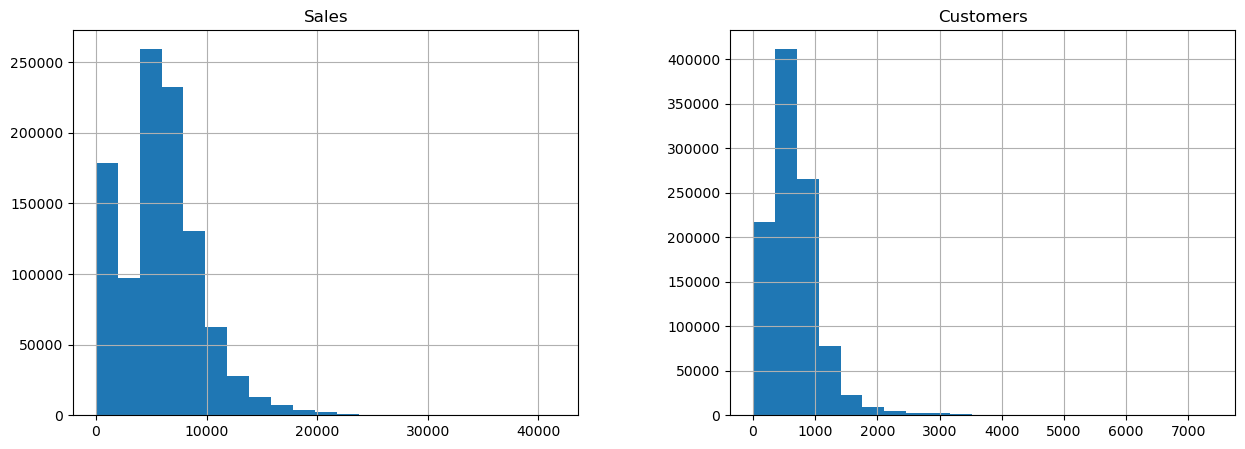

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2)

merged_df.hist(column='Sales',bins='sturges', ax=axes[0])
merged_df.hist(column='Customers', bins='sturges', ax=axes[1])

fig.set_size_inches(15, 5)
plt.show() 

`Histograms of our Sales and Customers values show us a positive skew and high kurtosis.`

Next we'll take a closer look at our statistics for our Sales column.

In [18]:
print("skew     " + str(round(merged_df['Sales'].skew(),6)))
print("kurtosis " + str(round(merged_df['Sales'].kurtosis(),6)))
print(merged_df['Sales'].describe().round(3))
print("mode     " + str(merged_df['Sales'].mode()))

skew     0.64146
kurtosis 1.778375
count    1017209.000
mean        5773.819
std         3849.926
min            0.000
25%         3727.000
50%         5744.000
75%         7856.000
max        41551.000
Name: Sales, dtype: float64
mode     0    0
Name: Sales, dtype: int64


We can see our sales figures have a slightly positive skew, with the mean (5773.819) only slightly larger than the median (5744.000), suggesting most outliers are to the right of themean.

High kurtosis indicates it's leptokurtic with the likelihood of heavy tails and outliers that may be extreme. Considering our min and max values of 0 and 41,551 sales, we aren't surprised to see there may be some extreme outliers.

The max value well above the mean of 5,773.819 and outside the standard deviation of 3849.926 helps us see how our mean ends up getting pulled slightly to the right for our positive skew.

There is no mode as we don't have any stores recording the exact same number of sales on any days, which isn't surprising.


## Preprocessing and Feature Engineering

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

### Date

First, let's convert Date to a datecolumn and extract different parts of the date.

In [20]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [21]:
split_date(merged_df)
split_date(merged_test_df)


In [22]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


## Store Open/Closed

Next, notice that the sales are ZERO whenever the store is closed

In [23]:
merged_df[merged_df.Open == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

Instead of trying to model this relationship, it would be better to hard-code it in our predictions, and remove the rows where the store is closed. We won't remove any rows from the test set, since we need to make predictions for every row.

In [24]:
merged_df = merged_df[merged_df.Open == 1].copy()

## Competition

Next, we can use the columns CompetitionOpenSince [Month/Year] columns from store df to compute the number of months for which a competitor has been open near the store.

In [25]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [26]:
comp_months(merged_df)
comp_months(merged_test_df)

In [27]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


In [28]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
20582,2015-07-13,400.0,2013.0,8.0,23.0
518492,2014-03-24,1760.0,NaN,NaN,0.0
306204,2014-10-18,32240.0,2010.0,3.0,55.0
265330,2014-12-01,3330.0,2001.0,10.0,158.0
657997,2013-11-19,6270.0,2005.0,2.0,105.0
551969,2014-02-22,6320.0,NaN,NaN,0.0
173563,2015-02-26,2770.0,2008.0,6.0,80.0
671579,2013-11-06,2340.0,2009.0,5.0,54.0
339702,2014-09-12,6540.0,NaN,NaN,0.0
665516,2013-11-12,7420.0,2013.0,4.0,7.0


## Additional Promotion

We can also add some additional columns to indicate how long a store has been running Promo2 and whether a new round of Promo starts in the current month.

In [29]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [30]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [31]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,76.0,0.000000,0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,159.0,0.000000,0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0,1.213115,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,0.0,0.000000,0


In [32]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
1002039,2013-01-14,1,2009.0,45.0,"Feb,May,Aug,Nov",38.360656,0
59037,2015-06-09,1,2010.0,35.0,"Mar,Jun,Sept,Dec",57.475410,1
203217,2015-01-30,1,2011.0,14.0,"Mar,Jun,Sept,Dec",45.934426,0
287203,2014-11-07,0,NaN,NaN,NaN,0.000000,0
866435,2013-05-16,1,2013.0,5.0,"Feb,May,Aug,Nov",3.442623,1
342556,2014-09-09,1,2010.0,13.0,"Jan,Apr,Jul,Oct",53.508197,0
692670,2013-10-19,1,2014.0,40.0,"Jan,Apr,Jul,Oct",0.000000,0
422516,2014-06-18,1,2011.0,40.0,"Jan,Apr,Jul,Oct",32.557377,0
967483,2013-02-14,1,2009.0,37.0,"Jan,Apr,Jul,Oct",41.114754,0
256057,2014-12-10,0,NaN,NaN,NaN,0.000000,0


The features related to competition and promotion are now much more useful.

## Input and Target Columns

In [33]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [34]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [35]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [36]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0,1,c,a,1270.0,82.0,31,7,2015,31,0,0.000000,0
1,2,5,1,0,1,a,a,570.0,92.0,31,7,2015,31,1,64.131148,1
2,3,5,1,0,1,a,a,14130.0,103.0,31,7,2015,31,1,51.901639,1
3,4,5,1,0,1,c,c,620.0,70.0,31,7,2015,31,0,0.000000,0
4,5,5,1,0,1,a,a,29910.0,3.0,31,7,2015,31,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,0,a,1,b,a,150.0,76.0,1,1,2013,1,0,0.000000,0
1016827,733,2,0,a,1,b,b,860.0,159.0,1,1,2013,1,0,0.000000,0
1016863,769,2,0,a,1,b,b,840.0,0.0,1,1,2013,1,1,1.213115,1
1017042,948,2,0,a,1,b,b,1430.0,0.0,1,1,2013,1,0,0.000000,0


In [37]:
targets

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 844392, dtype: int64

In [38]:
test_inputs = merged_test_df[input_cols].copy()

Let's also identify numeric and categorical columns. Note that we can treat binary categorical columns (0/1) as numeric columns.

In [39]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

## Impute missing numerical data

In [40]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [41]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

Seems like competition distance is the only missing value, and we can simply fill it with the highest value (to indicate that competition is very far away).

In [42]:
max_distance = inputs.CompetitionDistance.max()
max_distance

75860.0

In [43]:
inputs['CompetitionDistance'].fillna(max_distance*2, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance*2, inplace=True)

## Scale Numeric Valus

Let's scale numeric values to the 0 to 1 range.

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [46]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

## Encode Categorical Columns

Let's one-hot encode categorical columns.

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [49]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Finally, let's extract out all the numeric data for training.

In [50]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

We haven't created a validation set yet, because we'll use K-fold cross validation.

## Gradient Boosting

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions for the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model. 

Here's a visual representation of gradient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)


>**Prediction = Actual Value + Learning Rate * Decision tree (1) + Learning Rate * Decision tree(2) + .......**

### Training

To train a GBM, we can use the `XGBRegressor` class from the [`XGBoost`](https://xgboost.readthedocs.io/en/latest/) library.

In [51]:
from xgboost import XGBRegressor

In [52]:
# ?XGBRegressor

In [194]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

> n_ jobs -> to configure the number of thread that it should use in the background (-1 means all threads available in machine) <br>
> n_estimators -> number of decision trees that we will create<br>

If we train an unbounded decision tree to predict the residuals then it will completely overfit the data therefore we are setting the max_depth = 4

Let's train the model using `model.fit`.

In [195]:
%%time
model.fit(X,targets)

CPU times: user 20 s, sys: 2.21 s, total: 22.2 s
Wall time: 3.18 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

> How the `.fit` method of `XGBRegressor` applies the iterative machine learning workflow to train the model using the training data.
> 
> <img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

### Prediction

We can now make predictions and evaluate the model using `model.predict`.

In [196]:
preds = model.predict(X)

In [197]:
preds

array([ 8127.9404,  7606.919 ,  8525.857 , ...,  6412.8247,  9460.068 ,
       10302.145 ], dtype=float32)

### Evaluation

Let's evaluate the predictions using RMSE error.

In [198]:
from sklearn.metrics import mean_squared_error

def rmse(a,b):
    return mean_squared_error(a,b,squared=False)

In [199]:
rmse(preds,targets)

2377.752008804669

In [200]:
merged_df.Sales.min(), merged_df.Sales.max()

(0, 41551)

(array([1.632e+03, 5.267e+03, 2.278e+03, 5.790e+02, 1.600e+02, 5.400e+01,
        2.000e+01, 5.000e+00, 3.000e+00, 2.000e+00]),
 array([  748. ,  4264.1,  7780.2, 11296.3, 14812.4, 18328.5, 21844.6,
        25360.7, 28876.8, 32392.9, 35909. ]),
 <BarContainer object of 10 artists>)

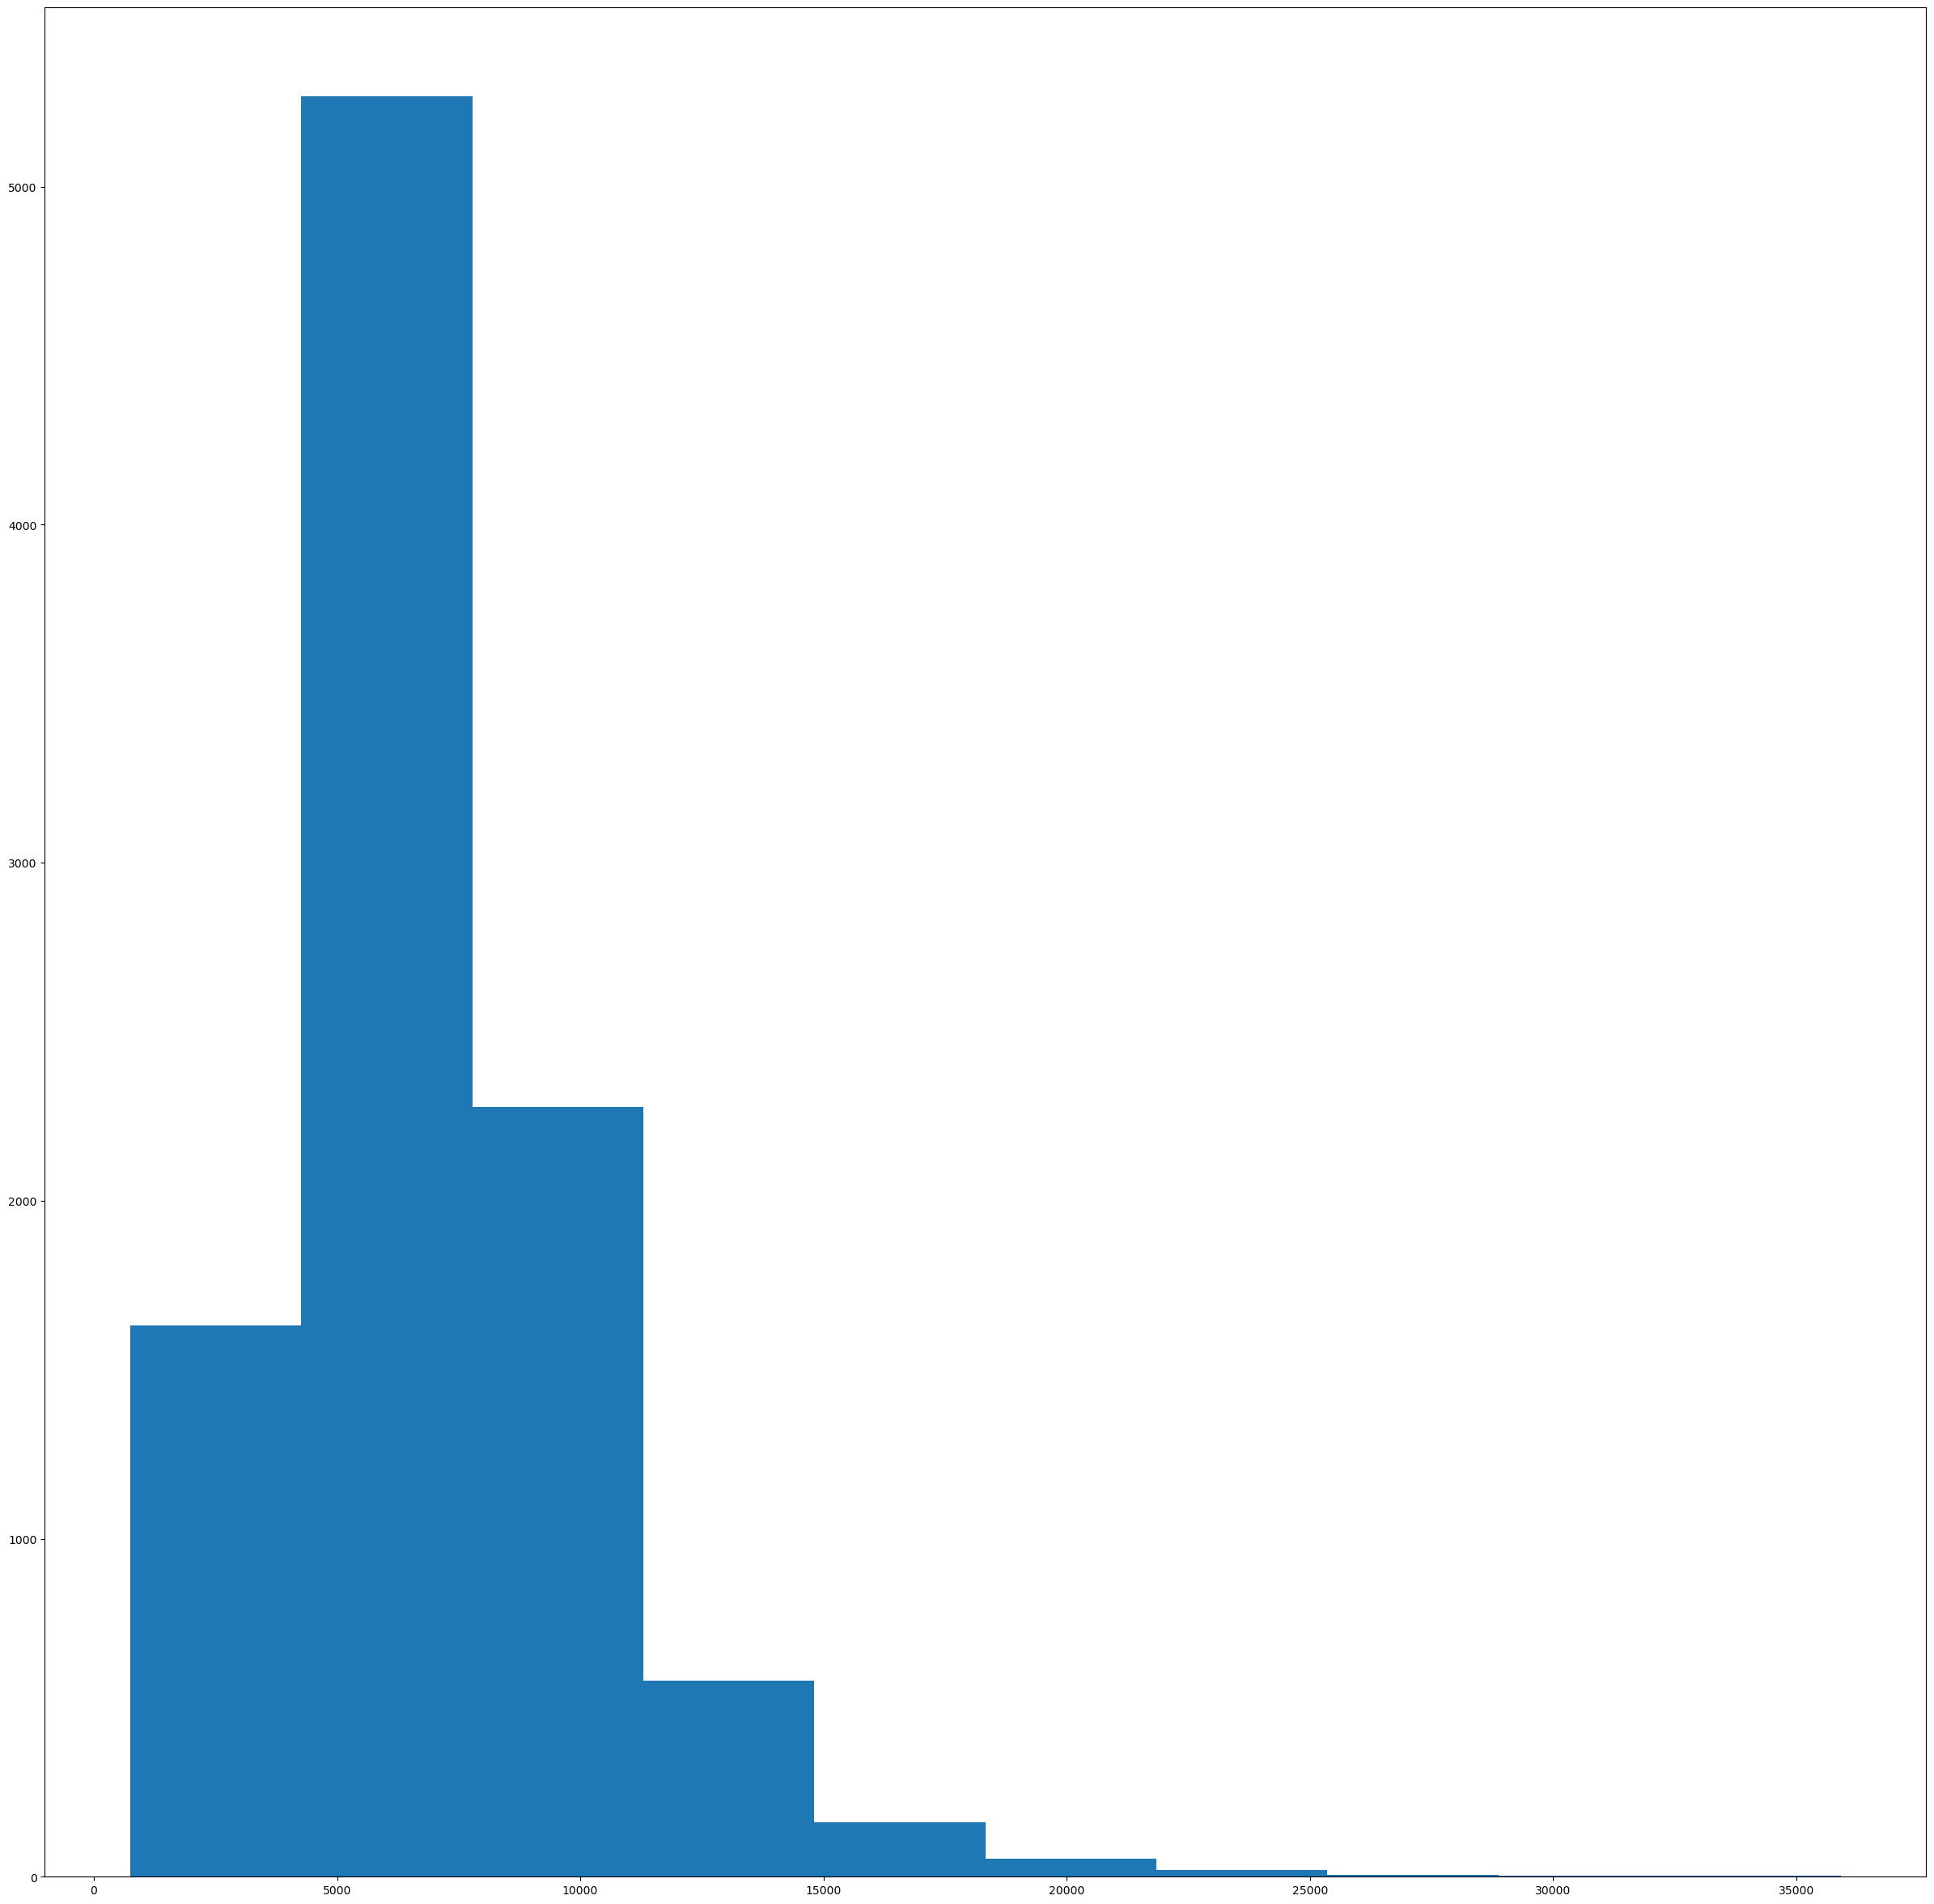

In [201]:
plt.hist(merged_df.Sales.sample(10000))

> Reason why gradient bosting is better than Random Forest in lot of cases because of this residual trick, because each time for each tree, we are reducing what it needs to learn than random forest where tree has to learn the entire relationship

### Visualization

We can visualize individual trees using `plot_tree` (note: this requires the `graphviz` library to be installed).

In [202]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

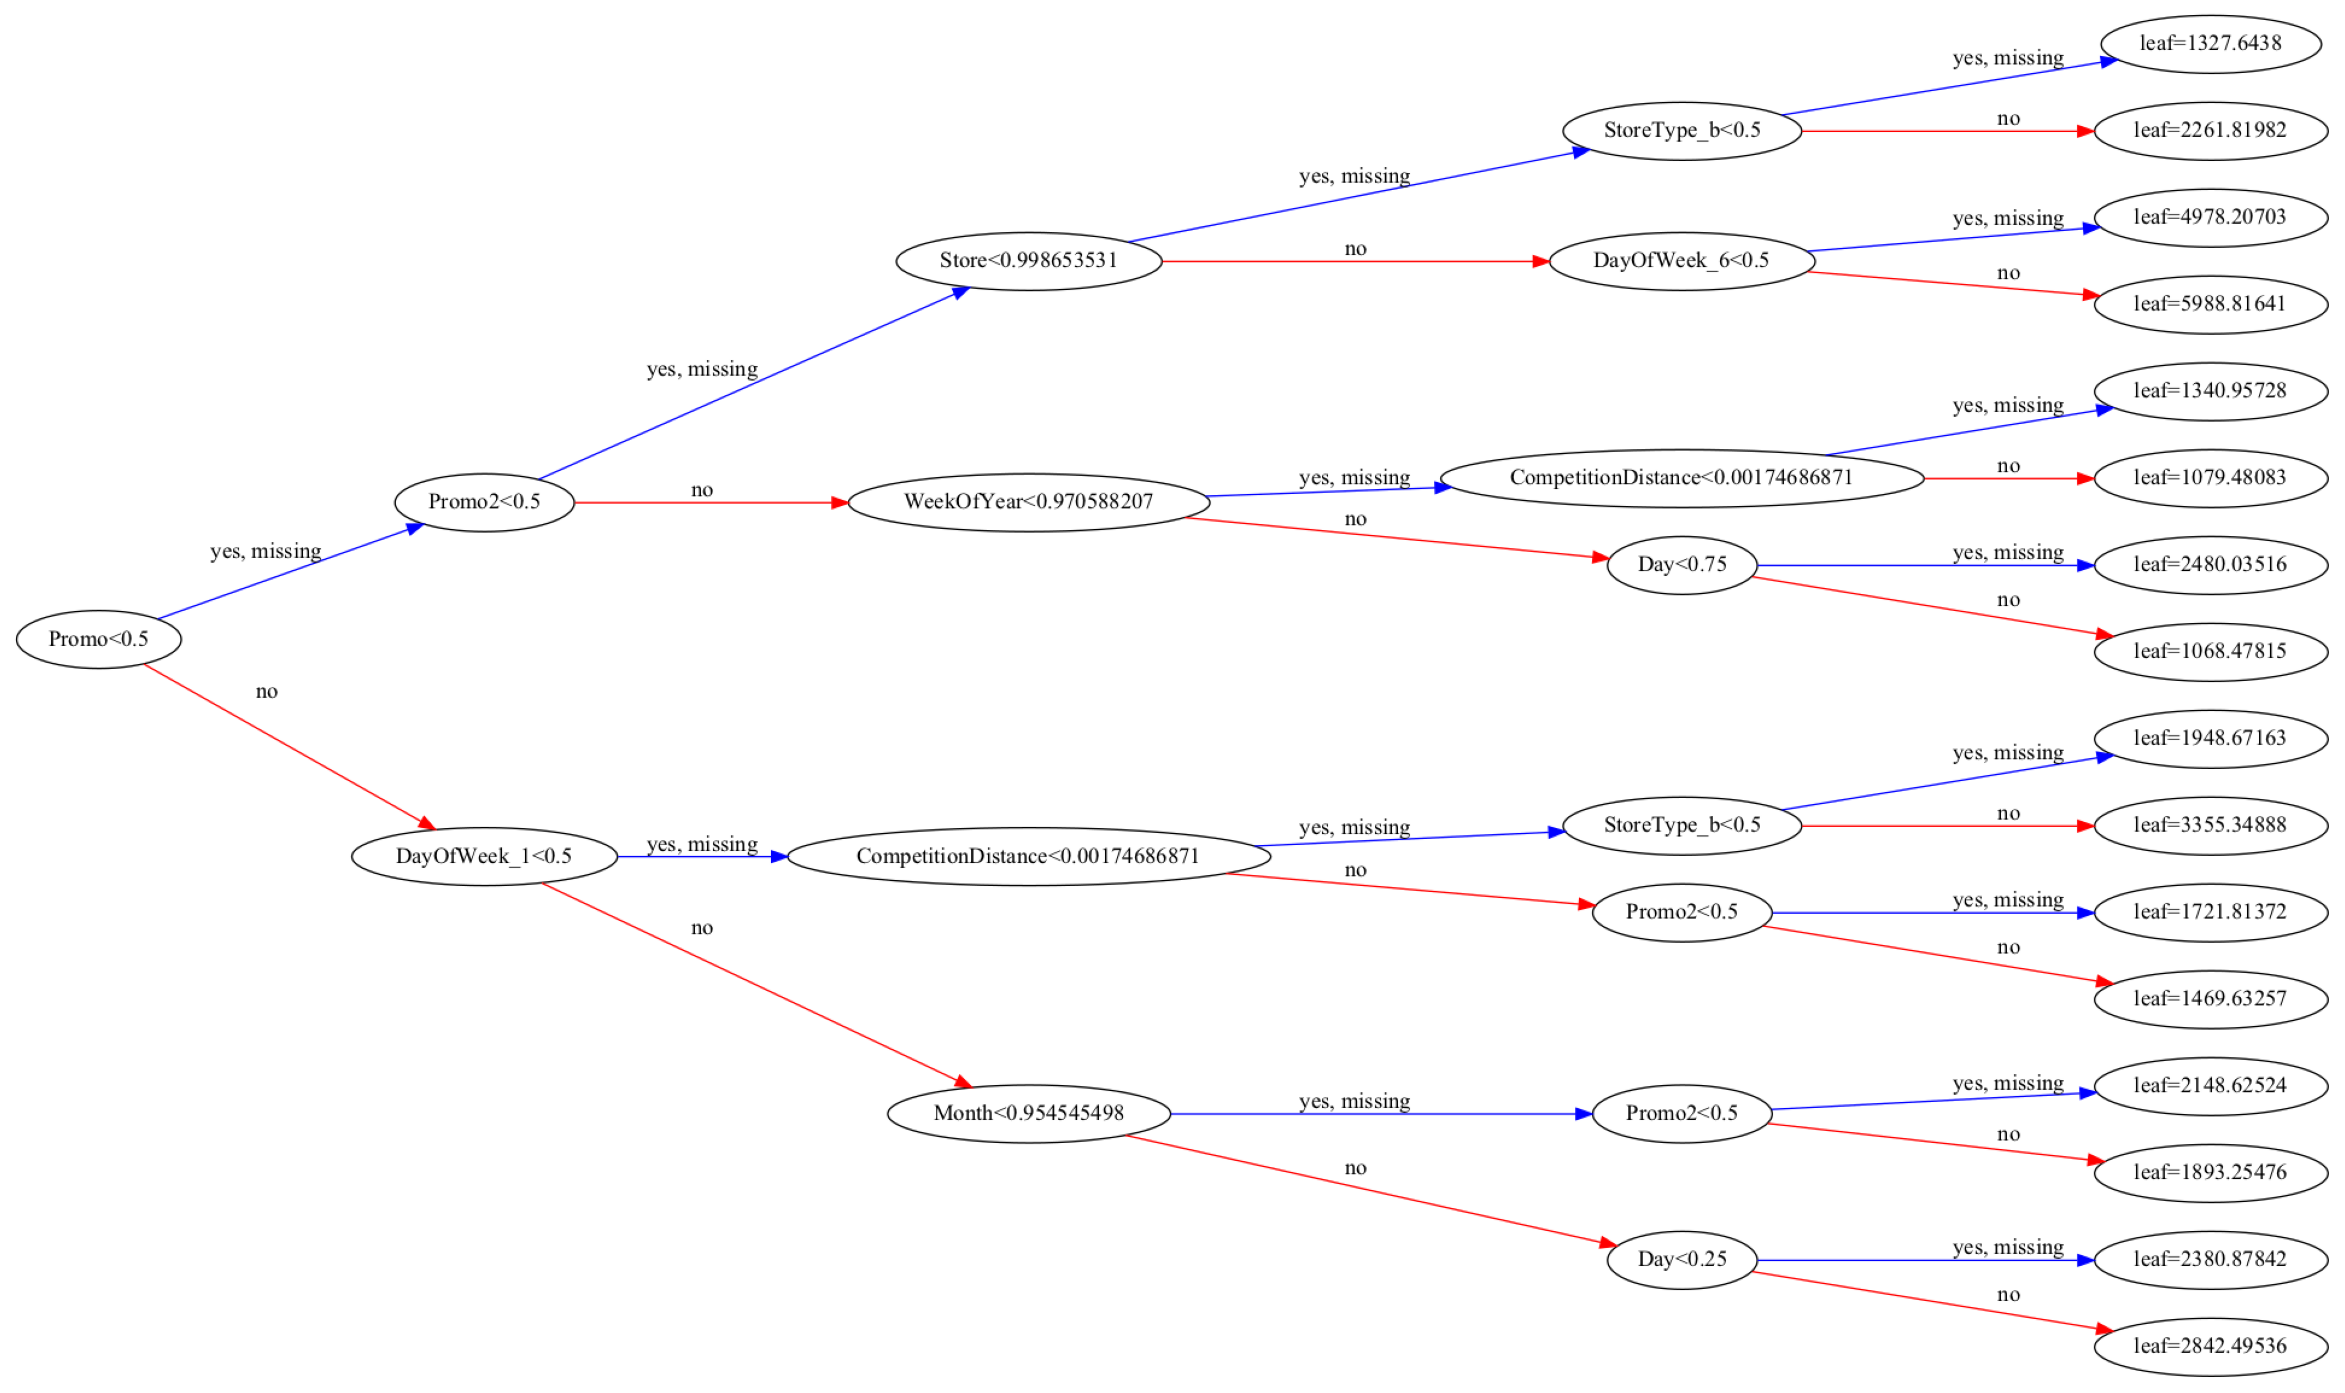

In [203]:
plot_tree(model, rankdir='LR', num_trees=1);

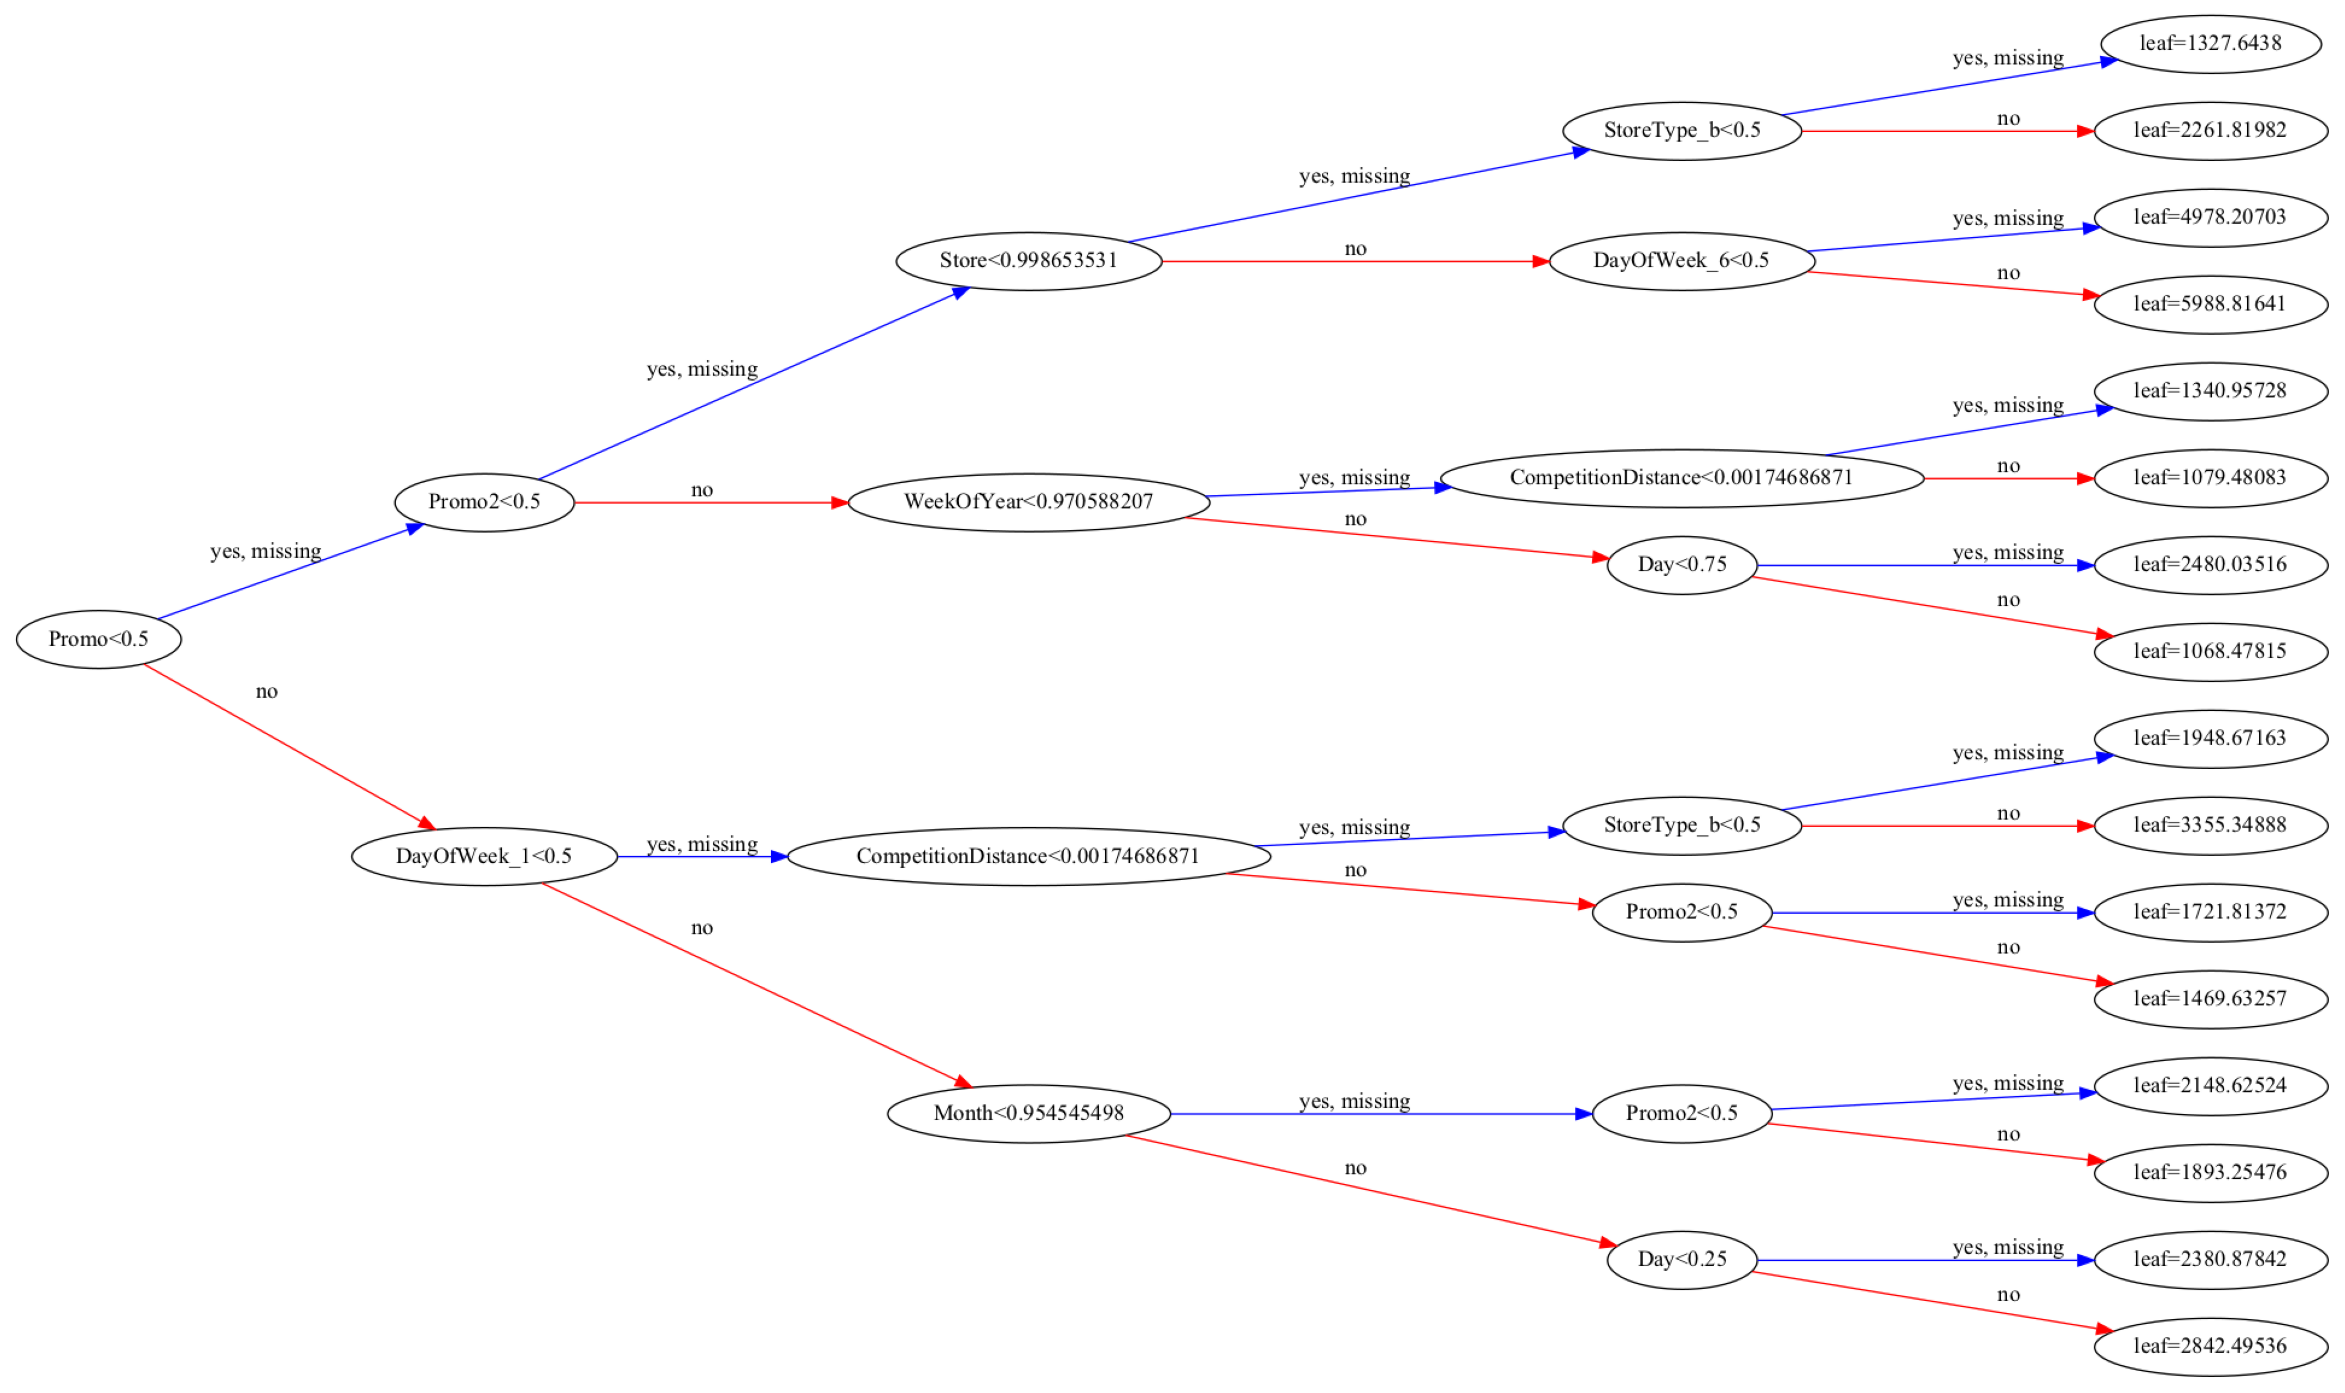

In [204]:
plot_tree(model, rankdir='LR', num_trees=1);

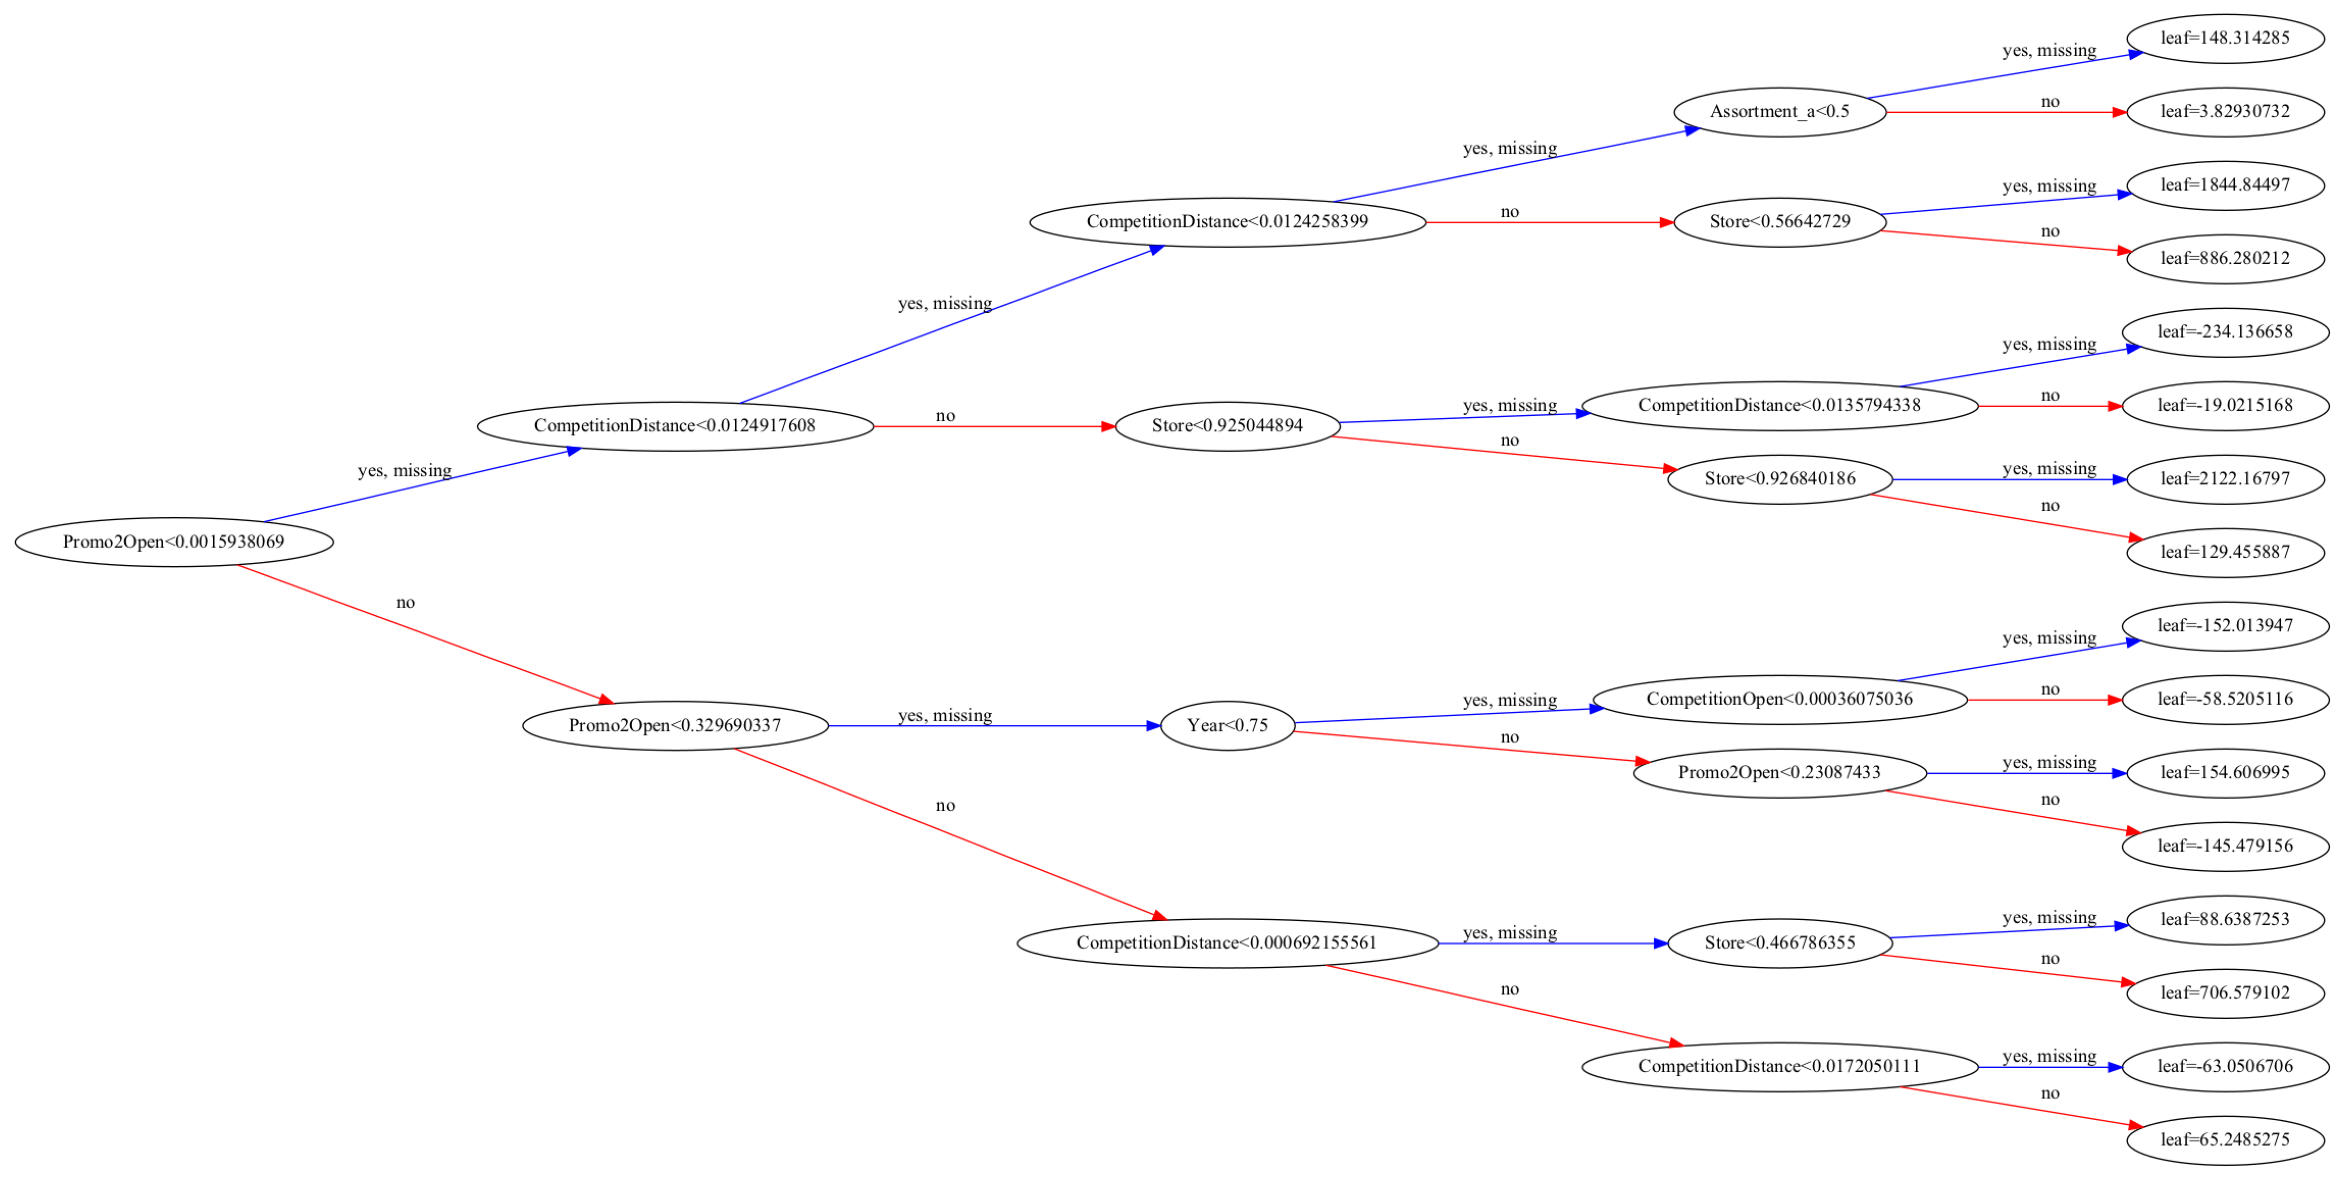

In [205]:
plot_tree(model, rankdir='LR', num_trees=19);

Notice how the trees only compute residuals, and not the actual target value. We can also visualize the tree as text.

In [206]:
trees = model.get_booster().get_dump()

In [207]:
len(trees)

20

In [208]:
print(trees[0])

0:[Promo<0.5] yes=1,no=2,missing=1
	1:[StoreType_b<0.5] yes=3,no=4,missing=3
		3:[Assortment_a<0.5] yes=7,no=8,missing=7
			7:[CompetitionDistance<0.00220830599] yes=15,no=16,missing=15
				15:leaf=2309.51147
				16:leaf=1823.30444
			8:[WeekOfYear<0.911764741] yes=17,no=18,missing=17
				17:leaf=1619.43994
				18:leaf=2002.44897
		4:[CompetitionDistance<0.00800922886] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.00672379695] yes=19,no=20,missing=19
				19:leaf=2740.44067
				20:leaf=5576.85889
			10:[DayOfWeek_7<0.5] yes=21,no=22,missing=21
				21:leaf=1898.36487
				22:leaf=2961.08765
	2:[DayOfWeek_1<0.5] yes=5,no=6,missing=5
		5:[Month<0.954545498] yes=11,no=12,missing=11
			11:[StoreType_b<0.5] yes=23,no=24,missing=23
				23:leaf=2295.30566
				24:leaf=3294.27759
			12:[Day<0.333333343] yes=25,no=26,missing=25
				25:leaf=2754.58521
				26:leaf=3246.39014
		6:[Month<0.954545498] yes=13,no=14,missing=13
			13:[CompetitionDistance<0.00135135138] yes=27,no=28,missing=27
				27:le

> **Reduction of Entropy is Information Gain** <br><br>
> <img src="Entropy.png" width="480">


> <img src="information_gain.png" width="480">

### Feature importance

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

> `feature_importances_` can be calculated in many ways, one of the way is called **information gain** which has to with how much each feature has contributed to reduction in loss over all the trees.<br>
> Second is called `weight`, which counts how many times a particular feature was used to create a split.

In [210]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [397]:
importance_df.head(10)

,feature,importance
1,Promo,0.317473
24,StoreType_b,0.086472
12,DayOfWeek_1,0.082268
5,Promo2,0.063986
3,CompetitionDistance,0.045053
29,Assortment_c,0.040226
27,Assortment_a,0.038759
9,Month,0.038493
0,Store,0.038119
8,Day,0.033209


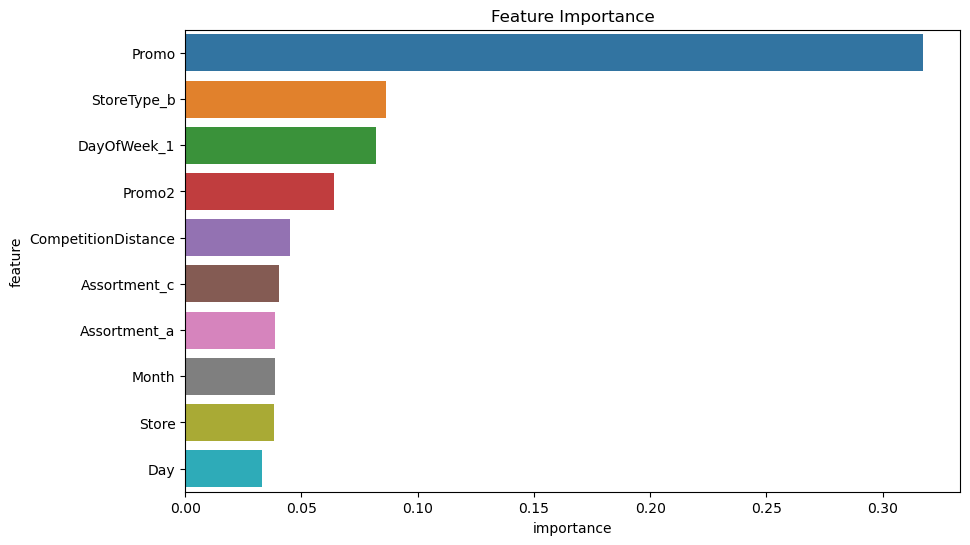

In [211]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

What can be done to improve the model : 
- Try Random Forest
- maybe try to turn off some feature
- play with parameters like n_estimators, max_depth or alpha


## K Fold Cross Validation

Notice that we didn't create a validation set before training our XGBoost model. We'll use a different validation strategy this time, called K-fold cross validation :

![](https://vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-15-at-11.13.53-AM.png)

Scikit-learn provides utilities for performing K fold cross validation.

In [150]:
from sklearn.model_selection import KFold

Let's define a helper function `train_and_evaluate` which trains a model the given parameters and returns the trained model, training error and validation error.

In [412]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    r2 = r2_score(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse, r2

Now, we can use the `KFold` utility to create the different training/validations splits and train a separate model for each fold.

In [182]:
# we can put shuffle = True but would not be good for sequential or timeseries data
kfold = KFold(n_splits=5)

In [160]:
for a,b in kfold.split(X):
    print(a)
    print(b)
    print("Break")

[168879 168880 168881 ... 844389 844390 844391]
[     0      1      2 ... 168876 168877 168878]
Break
[     0      1      2 ... 844389 844390 844391]
[168879 168880 168881 ... 337755 337756 337757]
Break
[     0      1      2 ... 844389 844390 844391]
[337758 337759 337760 ... 506633 506634 506635]
Break
[     0      1      2 ... 844389 844390 844391]
[506636 506637 506638 ... 675511 675512 675513]
Break
[     0      1      2 ... 675511 675512 675513]
[675514 675515 675516 ... 844389 844390 844391]
Break


In [161]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2352.216448531526, Validation RMSE: 2424.6228916973314
Train RMSE: 2406.709513789309, Validation RMSE: 2451.9646038059277
Train RMSE: 2365.7354745443067, Validation RMSE: 2336.984157073758
Train RMSE: 2366.4732092777763, Validation RMSE: 2460.8995475901697
Train RMSE: 2379.3752997474626, Validation RMSE: 2440.665320626728


Let's also define a function to average predictions from the 5 different models.

In [169]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [170]:
preds = predict_avg(models, X)

In [179]:
# This is ecactly what we did in `predict_avg` function
(models[0].predict(X) + models[1].predict(X) + models[2].predict(X) + models[3].predict(X) + models[4].predict(X))/5

array([8021.374 , 7577.715 , 8747.863 , ..., 7615.0303, 7924.784 ,
       9600.297 ], dtype=float32)

In [180]:
preds

array([8021.374 , 7577.715 , 8747.863 , ..., 7615.0303, 7924.784 ,
       9600.297 ], dtype=float32)

## Hyperparameter Tuning and Regularization

Just like other machine learning models, there are several hyperparameters we can to adjust the capacity of model and reduce overfitting.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">



In [181]:
models

[XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42, ...),
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
     

Here's a helper function to test hyperparameters with K-fold cross validation.

In [415]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models,r2_scores = [], [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse, r2 = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
        r2_scores.append(r2)
    print('Train RMSE: {}, Validation RMSE: {}, r2_score: {}'.format(np.mean(train_rmses), np.mean(val_rmses), np.mean(r2_scores)))
    return models

Since it may take a long time to perform 5-fold cross validation for each set of parameters we wish to try, we'll just pick a random 10% sample of the dataset as the validation set.

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [185]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [409]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    r2 = r2_score(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}, Accuracy Score: {}'.format(train_rmse, val_rmse,r2))

#### `n_estimators`

The number of trees to be created. More trees = greater capacity of the model.

In [367]:
test_params(n_estimators=10)

Train RMSE: 2351.1039995206306, Validation RMSE: 2359.0662634276555, Accuracy Score: -1.072738588964913


In [368]:
test_params(n_estimators=30)

Train RMSE: 1915.0358047225072, Validation RMSE: 1922.0362352932607, Accuracy Score: 0.08191743311986299


In [369]:
test_params(n_estimators=100)

Train RMSE: 1221.8220807600505, Validation RMSE: 1229.138371256561, Accuracy Score: 0.7688678764675523


In [370]:
test_params(n_estimators=240)

Train RMSE: 909.8897883064316, Validation RMSE: 923.521085677987, Accuracy Score: 0.894652423539179


In [371]:
test_params(n_estimators=500)

Train RMSE: 762.9372696077917, Validation RMSE: 792.891549576092, Accuracy Score: 0.9275000968564648


> ploting a graph of the training and validation error and determine the best value for `n_estimators`.

#### `max_depth`

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [373]:
test_params(max_depth=2)

Train RMSE: 2352.3896208131114, Validation RMSE: 2351.5784640898273, Accuracy Score: -0.8096723125446414


In [374]:
test_params(max_depth=5)

Train RMSE: 1423.1031038648857, Validation RMSE: 1421.7680170681103, Accuracy Score: 0.647394250111518


In [375]:
test_params(max_depth=8)

Train RMSE: 895.8088999749475, Validation RMSE: 923.472049102821, Accuracy Score: 0.8932152752597498


In [376]:
test_params(max_depth=10)

Train RMSE: 681.211229053739, Validation RMSE: 763.9341719031942, Accuracy Score: 0.9326234320708859


In [377]:
test_params(max_depth=12)

Train RMSE: 539.7533280238291, Validation RMSE: 727.069307979983, Accuracy Score: 0.939822347301939


In [378]:
test_params(max_depth=14)

Train RMSE: 398.8652870692891, Validation RMSE: 741.4053007038768, Accuracy Score: 0.937577357145753


In [379]:
test_params(max_depth=16)

Train RMSE: 276.39465177136196, Validation RMSE: 764.2283046352148, Accuracy Score: 0.9332474180891696


> ploting a graph of the training and validation error and determine the optimal.


#### `learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [380]:
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 5042.951471272301, Validation RMSE: 5051.636907648503, Accuracy Score: -59.422399075459886


In [381]:
test_params(n_estimators=50, learning_rate=0.1)

Train RMSE: 2188.0349753882138, Validation RMSE: 2193.44026653757, Accuracy Score: -0.5502868973166399


In [382]:
test_params(n_estimators=50, learning_rate=0.3)

Train RMSE: 1594.6692224702904, Validation RMSE: 1600.861898857638, Accuracy Score: 0.4909937023400285


In [383]:
test_params(n_estimators=50, learning_rate=0.9)

Train RMSE: 1143.4659803555664, Validation RMSE: 1152.9899293664844, Accuracy Score: 0.8412897064643932


In [384]:
test_params(n_estimators=50, learning_rate=0.99)

Train RMSE: 1162.3822981949656, Validation RMSE: 1175.3520094318944, Accuracy Score: 0.8412908979864121


> ploting a graph of the training and validation error and determine the optimal.


#### `booster`

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

In [385]:
test_params(booster='gblinear')

Train RMSE: 2727.564780343275, Validation RMSE: 2726.3594514004753, Accuracy Score: -2.3922268266183195


Clearly, a linear model is not well suited for this dataset.

> Exeperimenting with other hyperparameters like `gamma`, `min_child_weight`, `max_delta_step`, `subsample`, `colsample_bytree` etc. and finding their optimal values. Learn more about them here: https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor

In [386]:
test_params(n_estimators=240,max_depth=10, learning_rate = 0.1 )

Train RMSE: 721.0994788289532, Validation RMSE: 788.5845470113511, Accuracy Score: 0.9240602485910456


In [387]:
test_params(n_estimators=240,max_depth=10, learning_rate = 0.2 )

Train RMSE: 593.875118694713, Validation RMSE: 706.3971190103678, Accuracy Score: 0.9434308239059771


In [388]:
test_params(n_estimators=100,max_depth=10, learning_rate = 0.2 )

Train RMSE: 778.8539212411283, Validation RMSE: 840.4985801811173, Accuracy Score: 0.9123499463102939


In [389]:
test_params(n_estimators=100,max_depth=8, learning_rate = 0.1 )

Train RMSE: 1428.8458709916647, Validation RMSE: 1441.8680677280345, Accuracy Score: 0.6041394399558695


In [390]:
test_params(n_estimators=120,max_depth=8, learning_rate = 0.2)

Train RMSE: 970.2495182228719, Validation RMSE: 994.4908631951146, Accuracy Score: 0.8664107835305472


In [391]:
test_params(n_estimators=128,max_depth=8, learning_rate = 0.3 )

Train RMSE: 831.5223255239862, Validation RMSE: 865.7520497421104, Accuracy Score: 0.9094704403156108


In [392]:
test_params(n_estimators=500,max_depth=8, learning_rate = 0.2 )

Train RMSE: 635.3200787231725, Validation RMSE: 708.322981733534, Accuracy Score: 0.9433971922610678


In [393]:
test_params(n_estimators=500,max_depth=8, learning_rate = 0.1 )

Train RMSE: 749.2067720800612, Validation RMSE: 788.5936333833389, Accuracy Score: 0.9256895880394291


In [394]:
test_params(n_estimators=500,max_depth=8, learning_rate = 0.3 )

Train RMSE: 583.888902222529, Validation RMSE: 685.6359986665407, Accuracy Score: 0.9478399885996464


In [395]:
test_params(n_estimators=500,max_depth=8, learning_rate = 0.15 )

Train RMSE: 677.5186173046841, Validation RMSE: 732.9916609872384, Accuracy Score: 0.938302229837366


In [396]:
test_params(n_estimators=100,max_depth=8, learning_rate = 0.2 )

Train RMSE: 1049.035970627211, Validation RMSE: 1069.7376645490435, Accuracy Score: 0.8371746946276238


In [422]:
test_params(n_estimators=1000,learning_rate=0.2, max_depth=10, 
            subsample=0.9, 
            colsample_bytree=0.7 )

Train RMSE: 376.3096599838818, Validation RMSE: 638.3397167514861, Accuracy Score: 0.9554532467999353


> Training a model with our best hyperparmeters and evaluate its peformance using 5-fold cross validation.

In [417]:
test_params_kfold(5, n_estimators=240,max_depth=10, learning_rate = 0.1 )

Train RMSE: 718.3350323296861, Validation RMSE: 1154.7380620674714, r2_score: 0.8249007288943272


[XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=240, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42, ...),
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
           

## Putting it Together and Making Predictions

Let's train a final model on the entire training set with custom hyperparameters. 

In [236]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [237]:
%%time
model.fit(X, targets)

CPU times: user 38min 55s, sys: 4min 31s, total: 43min 27s
Wall time: 5min 45s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [418]:
importance_df_model = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [420]:
importance_df_model.head(10)

,feature,importance
24,StoreType_b,0.174385
18,DayOfWeek_7,0.098774
28,Assortment_b,0.095673
1,Promo,0.091887
5,Promo2,0.081603
0,Store,0.052117
27,Assortment_a,0.046261
3,CompetitionDistance,0.043820
23,StoreType_a,0.043750
29,Assortment_c,0.040397


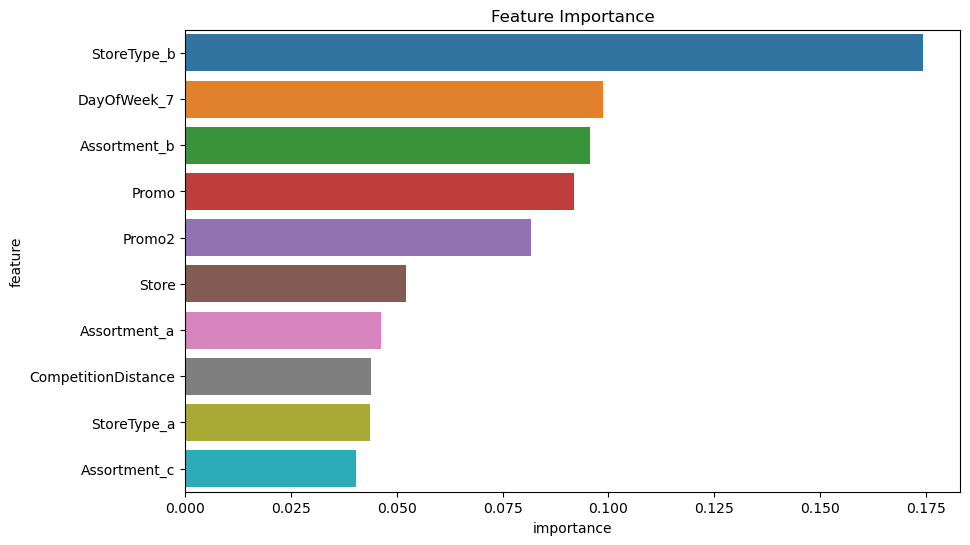

In [421]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df_model.head(10), x='importance', y='feature');

Now that the model is trained, we can make predictions on the test set.

In [300]:
test_preds = model.predict(X_test)

In [301]:
results = model.evals_result()

In [333]:
evalset = [(X, targets), (X_test,test_preds)]

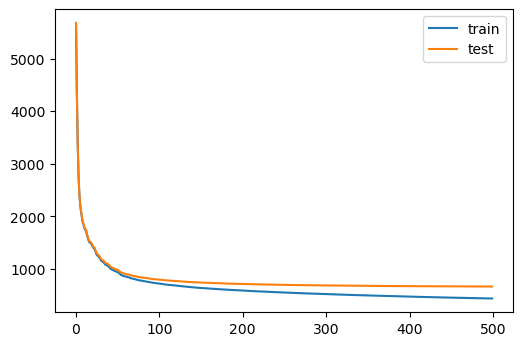

In [334]:
def cm_to_inch(value):
    return value/2.54
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))
pyplot.plot(results['validation_0']['rmse'], label='train')
pyplot.plot(results['validation_1']['rmse'], label='test')
# show the legend
pyplot.legend()
# show the plot

pyplot.show()

Let's add the predictions into `submission_df`.

In [314]:
submission_df['Sales']  = test_preds

Recall, however, if if the store is not open, then the sales must be 0. Thus, wherever the value of `Open` in the test set is 0, we can set the sales to 0. Also, there some missing values for `Open` in the test set. We'll replace them with 1 (open).

In [315]:
test_df.Open.isna().sum()

11

In [316]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [317]:
submission_df

,Id,Sales
0,1,3909.080566
1,2,8022.311035
2,3,9347.429688
3,4,7086.374023
4,5,7916.354492
...,...,...
41083,41084,4102.900391
41084,41085,9115.166016
41085,41086,7472.011719
41086,41087,25696.160156


We can now save the predictions as a CSV file.

In [318]:
submission_df.to_csv('submission.csv', index=None)

> function `predict_input` which can make predictions for a single input provided as a dictionary. Make sure to include all the feature engineering and preprocessing steps. Refer to previous tutorials for hints.

In [424]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [465]:
sample_input = {
    'Store': 2,
    'DayOfWeek': 4,
    'Date': '2015-04-23',
    'Open': 1,
    'Promo': 1,
    'StateHoliday': 'a',
    'SchoolHoliday': 0,
}


In [512]:
input_df = pd.DataFrame([sample_input])
input_df

0    2015-04-23
Name: Date, dtype: object

In [467]:
# Merge with stores_df
input_merged_df = input_df.merge(store_df, on='Store')
input_merged_df

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2,4,2015-04-23,1,1,a,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [468]:
# Feature engineering
# Dates
split_date(input_merged_df)
# Competition
comp_months(input_merged_df)
# Promo2
promo_cols(input_merged_df)
input_merged_df

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,2,4,2015-04-23,1,1,a,0,a,a,570.0,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,4,23,17,89.0,60.918033,1


In [469]:
# Preprocessing
# Imputation - not require
# Scaling
input_merged_df[numeric_cols] = scaler.transform(input_merged_df[numeric_cols])
# Encoding
input_merged_df[encoded_cols] = encoder.transform(input_merged_df[categorical_cols])

In [470]:
# Selecting the right columns (numerical + encoded)
X_input = input_merged_df[numeric_cols + encoded_cols]
# Pass it into the model
model.predict(X_input)[0]

3271.2178

So the model predicts that given this sample input, the output or sales on this particular date is going to be `3271.21` based on everything our model has leaned from out data

In [472]:
sample_input

{'Store': 2,
 'DayOfWeek': 4,
 'Date': '2015-04-23',
 'Open': 1,
 'Promo': 1,
 'StateHoliday': 'a',
 'SchoolHoliday': 0}

In [615]:
def Predict_fun(input_df):
        try:
            # Merge with stores_df
            input_merged_df = input_df.merge(store_df, on='Store')
            # Feature engineering
            # Dates
            split_date(input_merged_df)
            # Competition
            comp_months(input_merged_df)
            # Promo2
            promo_cols(input_merged_df)
            # Preprocessing
            # Imputation - not require
            # Scaling
            input_merged_df[numeric_cols] = scaler.transform(input_merged_df[numeric_cols])
            # Encoding
            input_merged_df[encoded_cols] = encoder.transform(input_merged_df[categorical_cols])
            # Selecting the right columns (numerical + encoded)
            X_input = input_merged_df[numeric_cols + encoded_cols]
            # Pass it into the model
            output = round(model.predict(X_input)[0])
            return "Predicted Sales on {0} is {1}".format(input_df['Date'][0], output )
        # except Exception as e:
              # print(e)
        except:
            print("Predict_fun required 7 columns but {} is given".format(len(input_df.columns)))
          

In [616]:
Predict_fun(input_df)

'Predicted Sales on 2015-04-23 is 3271'

In [619]:
sample_input1 = {
    'Store': 2,
    'DayOfWeek': 4,
    'Date': '2015-04-23',
    'Open': 1,
    'Promo': 1,
    'StateHoliday': 'a'
}
input_df1 = pd.DataFrame([sample_input1])

In [620]:
Predict_fun(input_df1)

Predict_fun required 7 columns but 6 is given


> Save the model and all the other required objects using joblib.

In [335]:
import joblib

joblib.dump(model, "xgb_reg.sav")
xgb_reg = joblib.load("xgb_reg.sav")


In [621]:
import pickle

pickle.dump(model, open("xgb_reg.pkl", "wb"))
xgb_reg = pickle.load(open("xgb_reg.pkl", "rb"))